<a href="https://colab.research.google.com/github/suelen-prs/EBAC/blob/main/Mod13_Tarefa01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda

Vamos trabalhar com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [39]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy


In [79]:
prev_renda = pd.read_csv('previsao_de_renda.csv')
prev_renda.drop('Unnamed: 0', axis=1, inplace=True)

In [80]:
prev_renda.head(10)

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
5,2015-01-01,7409,M,False,True,0,Assalariado,Superior incompleto,Casado,Casa,46,15.561644,2.0,False,5483.58
6,2015-01-01,6913,F,False,True,0,Assalariado,Secundário,Casado,Casa,51,5.046575,2.0,False,1947.99
7,2015-01-01,13047,M,True,True,0,Empresário,Secundário,Casado,Casa,24,1.591781,2.0,False,7781.51
8,2015-01-01,4529,F,False,False,0,Assalariado,Secundário,Casado,Casa,53,3.430137,2.0,False,5577.82
9,2015-01-01,14646,F,False,True,2,Servidor público,Secundário,União,Casa,34,7.219178,4.0,False,803.34


In [42]:
prev_renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   index                  15000 non-null  int64  
 2   sexo                   15000 non-null  object 
 3   posse_de_veiculo       15000 non-null  bool   
 4   posse_de_imovel        15000 non-null  bool   
 5   qtd_filhos             15000 non-null  int64  
 6   tipo_renda             15000 non-null  object 
 7   educacao               15000 non-null  object 
 8   estado_civil           15000 non-null  object 
 9   tipo_residencia        15000 non-null  object 
 10  idade                  15000 non-null  int64  
 11  tempo_emprego          12466 non-null  float64
 12  qt_pessoas_residencia  15000 non-null  float64
 13  mau                    15000 non-null  bool   
 14  renda                  15000 non-null  float64
dtypes:

1. Ajuste um modelo para prever log(renda) considerando todas as covariáveis disponíveis.
    - Utilizando os recursos do Patsy, coloque as variáveis qualitativas como *dummies*.
    - Mantenha sempre a categoria mais frequente como casela de referência
    - Avalie os parâmetros e veja se parecem fazer sentido prático.  


2. Remova a variável menos significante e analise:
    - Observe os indicadores que vimos, e avalie se o modelo melhorou ou piorou na sua opinião.
    - Observe os parâmetros e veja se algum se alterou muito.  


3. Siga removendo as variáveis menos significantes, sempre que o *p-value* for menor que 5%. Compare o modelo final com o inicial. Observe os indicadores e conclua se o modelo parece melhor.
    

In [17]:
# Ajuste um modelo para prever log(renda) considerando todas as covariáveis disponíveis

In [43]:
# selecionando variáveis qualitativas
var_qual = prev_renda.select_dtypes(include=['object','bool'])
var_qual.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia,mau
0,2015-01-01,F,False,True,Assalariado,Secundário,Casado,Casa,False
1,2015-01-01,M,True,True,Empresário,Secundário,Casado,Casa,False
2,2015-01-01,M,True,True,Assalariado,Superior completo,Casado,Casa,False
3,2015-01-01,F,True,False,Empresário,Secundário,Casado,Casa,False
4,2015-01-01,M,False,False,Assalariado,Secundário,Casado,Casa,False


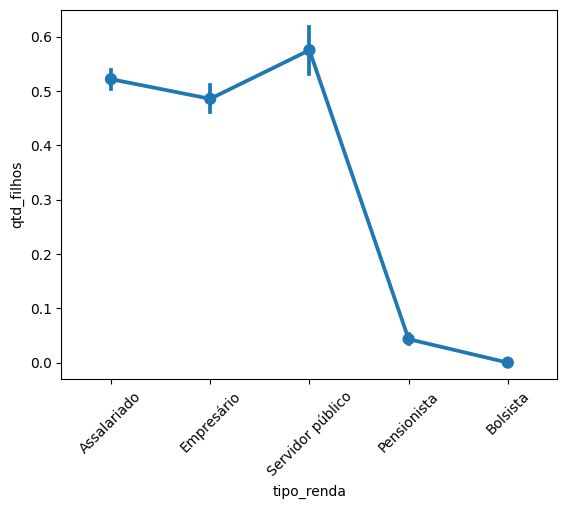

In [44]:
# exemplo de variável qualitativa
sns.pointplot(y = 'qtd_filhos', x = 'tipo_renda', data = prev_renda)
plt.xticks(rotation=45);

In [45]:
var_qual['educacao'].value_counts()

Secundário             8927
Superior completo      5262
Superior incompleto     599
Primário                193
Pós graduação            19
Name: educacao, dtype: int64

In [46]:
# Treatment para variável mais frequente
y, x = patsy.dmatrices('''
                       np.log(renda) ~
                               C(sexo, Treatment(0))
                               + C(tipo_renda, Treatment(0))
                               + C(educacao, Treatment(2))
                               + C(estado_civil, Treatment(0))
                               + C(tipo_residencia, Treatment(1))
                               + C(posse_de_veiculo, Treatment(0))
                               + C(posse_de_imovel, Treatment(1))
                               + qtd_filhos
                               + idade
                               + tempo_emprego
                               + qt_pessoas_residencia
                       ''', data = prev_renda)
x

DesignMatrix with shape (12466, 25)
  Columns:
    ['Intercept',
     'C(sexo, Treatment(0))[T.M]',
     'C(tipo_renda, Treatment(0))[T.Bolsista]',
     'C(tipo_renda, Treatment(0))[T.Empresário]',
     'C(tipo_renda, Treatment(0))[T.Pensionista]',
     'C(tipo_renda, Treatment(0))[T.Servidor público]',
     'C(educacao, Treatment(2))[T.Primário]',
     'C(educacao, Treatment(2))[T.Pós graduação]',
     'C(educacao, Treatment(2))[T.Superior completo]',
     'C(educacao, Treatment(2))[T.Superior incompleto]',
     'C(estado_civil, Treatment(0))[T.Separado]',
     'C(estado_civil, Treatment(0))[T.Solteiro]',
     'C(estado_civil, Treatment(0))[T.União]',
     'C(estado_civil, Treatment(0))[T.Viúvo]',
     'C(tipo_residencia, Treatment(1))[T.Aluguel]',
     'C(tipo_residencia, Treatment(1))[T.Com os pais]',
     'C(tipo_residencia, Treatment(1))[T.Comunitário]',
     'C(tipo_residencia, Treatment(1))[T.Estúdio]',
     'C(tipo_residencia, Treatment(1))[T.Governamental]',
     'C(posse_de_v

In [47]:
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     165.3
Date:                Tue, 10 Oct 2023   Prob (F-statistic):               0.00
Time:                        02:14:45   Log-Likelihood:                -13204.
No. Observations:               12466   AIC:                         2.646e+04
Df Residuals:                   12441   BIC:                         2.664e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.3242      0.258     28.409      0.000       6.819       7.830
C(sexo, Treatment(0))[T.M]                            0.4813      0.014     33.673      0.000       0.453       0.509
C(tipo_renda, Treatment(0))[T.Bolsista]              -0.0493      0.350     -0.141      0.888      -0.735       0.636
C(tipo_renda, Treatment(0))[T.Empresário]             0.1786      0.015     12.209      0.000       0.150       0.207
C(tipo_renda, Treatment(0))[T.Pensionista]            0.3784      0.233      1.623      0.105      -0.079       0.835
C(tipo_renda, Treatment(0))[T.Servidor público]       0.0950      0.021      4.485      0.000       0.053       0.136
C(educacao, Treatment(2))[T.Primário]                -0.0164      0.071     -0.232      0.817      -0.156       0.123
C(educacao, Treatment(2))[T.Pós graduação]            0.5338      0.161      3.321      0.001       0.219       0.849
C(educacao, Treatment(2))[T.Superior completo]        0.0968      0.013      7.193      0.000       0.070       0.123
C(educacao, Treatment(2))[T.Superior incompleto]     -0.0261      0.031     -0.845      0.398      -0.087       0.034
C(estado_civil, Treatment(0))[T.Separado]            -0.0437      0.131     -0.334      0.738      -0.300       0.213
C(estado_civil, Treatment(0))[T.Solteiro]             0.0169      0.128      0.131      0.895      -0.235       0.269
C(estado_civil, Treatment(0))[T.União]               -0.0259      0.023     -1.110      0.267      -0.072       0.020
C(estado_civil, Treatment(0))[T.Viúvo]               -0.0422      0.134     -0.314      0.753      -0.306       0.221
C(tipo_residencia, Treatment(1))[T.Aluguel]          -0.0148      0.053     -0.278      0.781      -0.119       0.090
C(tipo_residencia, Treatment(1))[T.Com os pais]      -0.0720      0.029     -2.449      0.014      -0.130      -0.014
C(tipo_residencia, Treatment(1))[T.Comunitário]       0.0427      0.089      0.483      0.629      -0.131       0.216
C(tipo_residencia, Treatment(1))[T.Estúdio]          -0.1242      0.072     -1.732      0.083      -0.265       0.016
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.0711      0.038     -1.893      0.058      -0.145       0.003
C(posse_de_veiculo, Treatment(0))[T.True]            -0.0012      0.014     -0.087      0.931      -0.028       0.026
C(posse_de_imovel, Treatment(1))[T.False]            -0.0849      0.014     -6.275      0.000      -0.111      -0.058
qtd_filhos                                            0.0087      0.128      0.068      0.946      -0.242       0.260
idade                                                 0.0052      0.001      6.625      0.000       0.004       0.007
tempo_emprego  

In [33]:
# Remova a variável menos significante e analise:

In [48]:
prev_renda['estado_civil'].value_counts()

Casado      10550
Solteiro     1767
União        1168
Separado      838
Viúvo         677
Name: estado_civil, dtype: int64

In [50]:
prev_renda['estado_civil'] = prev_renda['estado_civil'].apply(lambda i: i if i not in ['União', 'Casado'] else 'União/Casado')
prev_renda['estado_civil'] = prev_renda['estado_civil'].apply(lambda i: i if i not in ['Separado', 'Viúvo'] else 'Separado/Viúvo')
prev_renda['estado_civil'].value_counts()

União/Casado      11718
Solteiro           1767
Separado/Viúvo     1515
Name: estado_civil, dtype: int64

In [53]:
prev_renda['tipo_renda'].value_counts()

Assalariado         7826
Empresário          3311
Pensionista         2543
Servidor público    1316
Bolsista               4
Name: tipo_renda, dtype: int64

In [55]:
prev_renda['tipo_renda'] = prev_renda['tipo_renda'].apply(lambda i: i if i not in ['Bolsista', 'Pensionista', 'Assalariado'] else 'Bolsista/Pensionista/Assalariado')
prev_renda['tipo_renda'].value_counts()

Bolsista/Pensionista/Assalariado    10373
Empresário                           3311
Servidor público                     1316
Name: tipo_renda, dtype: int64

In [51]:
prev_renda['educacao'].value_counts()

Secundário             8927
Superior completo      5262
Superior incompleto     599
Primário                193
Pós graduação            19
Name: educacao, dtype: int64

In [52]:
prev_renda['educacao'] = prev_renda['educacao'].apply(lambda i: i if i not in ['Superior completo', 'Superior incompleto'] else 'Superior-Completo/Incompleto')
prev_renda['educacao'] = prev_renda['educacao'].apply(lambda i: i if i not in ['Primário', 'Secundário'] else 'Primário/Secundário')
prev_renda['educacao'].value_counts()

Primário/Secundário             9120
Superior-Completo/Incompleto    5861
Pós graduação                     19
Name: educacao, dtype: int64

In [58]:
# variáveis qualitativas como dummies
y, x = patsy.dmatrices('''
                       np.log(renda) ~
                               C(sexo, Treatment(0))
                               + C(tipo_renda, Treatment(0))
                               + C(educacao, Treatment(0))
                               + C(estado_civil, Treatment(2))
                               + C(posse_de_veiculo, Treatment(0))
                               + C(posse_de_imovel, Treatment(1))
                               + qtd_filhos
                               + idade
                               + tempo_emprego
                               + qt_pessoas_residencia
                       ''', data = prev_renda)
x

DesignMatrix with shape (12466, 14)
  Columns:
    ['Intercept',
     'C(sexo, Treatment(0))[T.M]',
     'C(tipo_renda, Treatment(0))[T.Empresário]',
     'C(tipo_renda, Treatment(0))[T.Servidor público]',
     'C(educacao, Treatment(0))[T.Pós graduação]',
     'C(educacao, Treatment(0))[T.Superior-Completo/Incompleto]',
     'C(estado_civil, Treatment(2))[T.Separado/Viúvo]',
     'C(estado_civil, Treatment(2))[T.Solteiro]',
     'C(posse_de_veiculo, Treatment(0))[T.True]',
     'C(posse_de_imovel, Treatment(1))[T.False]',
     'qtd_filhos',
     'idade',
     'tempo_emprego',
     'qt_pessoas_residencia']
  Terms:
    'Intercept' (column 0)
    'C(sexo, Treatment(0))' (column 1)
    'C(tipo_renda, Treatment(0))' (columns 2:4)
    'C(educacao, Treatment(0))' (columns 4:6)
    'C(estado_civil, Treatment(2))' (columns 6:8)
    'C(posse_de_veiculo, Treatment(0))' (column 8)
    'C(posse_de_imovel, Treatment(1))' (column 9)
    'qtd_filhos' (column 10)
    'idade' (column 11)
    'tempo_em

In [59]:
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     302.2
Date:                Tue, 10 Oct 2023   Prob (F-statistic):               0.00
Time:                        02:23:36   Log-Likelihood:                -13220.
No. Observations:               12466   AIC:                         2.647e+04
Df Residuals:                   12452   BIC:                         2.657e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                     7.2850      0.258     28.268      0.000       6.780       7.790
C(sexo, Treatment(0))[T.M]                                    0.4805      0.014     33.805      0.000       0.453       0.508
C(tipo_renda, Treatment(0))[T.Empresário]                     0.1778      0.015     12.178      0.000       0.149       0.206
C(tipo_renda, Treatment(0))[T.Servidor público]               0.0942      0.021      4.461      0.000       0.053       0.136
C(educacao, Treatment(0))[T.Pós graduação]                    0.5379      0.161      3.344      0.001       0.223       0.853
C(educacao, Treatment(0))[T.Superior-Completo/Incompleto]     0.0852      0.013      6.569      0.000       0.060       0.111
C(estado_civil, Treatment(2))[T.Separado/Viúvo]              -0.0366      0.130     -0.282      0.778      -0.292       0.218
C(estado_civil, Treatment(2))[T.Solteiro]                     0.0208      0.128      0.162      0.871      -0.231       0.273
C(posse_de_veiculo, Treatment(0))[T.True]                     0.0013      0.014      0.094      0.925      -0.026       0.028
C(posse_de_imovel, Treatment(1))[T.False]                    -0.0963      0.013     -7.281      0.000      -0.122      -0.070
qtd_filhos                                                    0.0059      0.128      0.046      0.963      -0.245       0.257
idade                                                         0.0058      0.001      7.583      0.000       0.004       0.007
tempo_emprego                                                 0.0482      0.001     48.413      0.000       0.046       0.050
qt_pessoas_residencia                                         0.0109      0.128      0.085      0.932      -0.240       0.262
==============================================================================
Omnibus:                        1.141   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.565   Jarque-Bera (JB):                1.112
Skew:                          -0.011   Prob(JB):                        0.573
Kurtosis:                       3.040   Cond. No.                     2.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
# Siga removendo as variáveis menos significantes, sempre que o p-value for menor que 5%. Compare o modelo final com o inicial.

In [61]:
# Vamos tornar idade e renda como variáveis categoricas

In [82]:
prev_renda.loc[prev_renda['idade']>=60, 'idade'] = '60+'
prev_renda['idade'].value_counts()

60+    1643
40      499
34      478
37      478
32      476
30      460
43      454
27      444
39      437
28      432
50      428
41      426
42      421
38      420
54      411
46      406
36      406
33      401
47      389
45      388
35      385
51      381
31      374
48      367
44      349
29      349
52      329
59      327
57      324
49      324
58      323
53      311
56      282
55      259
26      197
25      105
24       79
23       30
22        8
Name: idade, dtype: int64

In [83]:
prev_renda.loc[prev_renda['renda']>=2000, 'renda'] = '2k+'
prev_renda['renda'].value_counts()

2k+        11060
1980.63        6
1484.22        5
1653.17        5
796.44         5
           ...  
541.36         1
539.96         1
975.26         1
402.72         1
1541.46        1
Name: renda, Length: 2569, dtype: int64

In [89]:
y, x = patsy.dmatrices('''
                       np.log(qtd_filhos) ~
                               C(sexo, Treatment(0))
                               + C(tipo_renda, Treatment(0))
                               + C(educacao, Treatment(0))
                               + C(estado_civil, Treatment(2))
                               + C(posse_de_veiculo, Treatment(0))
                               + C(posse_de_imovel, Treatment(1))
                               + tempo_emprego
                               + C(qt_pessoas_residencia, Treatment(2))
                       ''', data = prev_renda)
x

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


DesignMatrix with shape (12466, 25)
  Columns:
    ['Intercept',
     'C(sexo, Treatment(0))[T.M]',
     'C(tipo_renda, Treatment(0))[T.Bolsista]',
     'C(tipo_renda, Treatment(0))[T.Empresário]',
     'C(tipo_renda, Treatment(0))[T.Pensionista]',
     'C(tipo_renda, Treatment(0))[T.Servidor público]',
     'C(educacao, Treatment(0))[T.Pós graduação]',
     'C(educacao, Treatment(0))[T.Secundário]',
     'C(educacao, Treatment(0))[T.Superior completo]',
     'C(educacao, Treatment(0))[T.Superior incompleto]',
     'C(estado_civil, Treatment(2))[T.Casado]',
     'C(estado_civil, Treatment(2))[T.Separado]',
     'C(estado_civil, Treatment(2))[T.União]',
     'C(estado_civil, Treatment(2))[T.Viúvo]',
     'C(posse_de_veiculo, Treatment(0))[T.True]',
     'C(posse_de_imovel, Treatment(1))[T.False]',
     'C(qt_pessoas_residencia, Treatment(2))[T.1.0]',
     'C(qt_pessoas_residencia, Treatment(2))[T.3.0]',
     'C(qt_pessoas_residencia, Treatment(2))[T.4.0]',
     'C(qt_pessoas_residencia,

In [90]:
sm.OLS(y, x).fit().summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1732: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.log(qtd_filhos)   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 10 Oct 2023   Prob (F-statistic):                nan
Time:                        02:43:03   Log-Likelihood:                    nan
No. Observations:               12466   AIC:                               nan
Df Residuals:                   12441   BIC:                               nan
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                               nan        nan        nan        nan         nan         nan
C(sexo, Treatment(0))[T.M]                              nan        nan        nan        nan         nan         nan
C(tipo_renda, Treatment(0))[T.Bolsista]                 nan        nan        nan        nan         nan         nan
C(tipo_renda, Treatment(0))[T.Empresário]               nan        nan        nan        nan         nan         nan
C(tipo_renda, Treatment(0))[T.Pensionista]              nan        nan        nan        nan         nan         nan
C(tipo_renda, Treatment(0))[T.Servidor público]         nan        nan        nan        nan         nan         nan
C(educacao, Treatment(0))[T.Pós graduação]              nan        nan        nan        nan         nan         nan
C(educacao, Treatment(0))[T.Secundário]                 nan        nan        nan        nan         nan         nan
C(educacao, Treatment(0))[T.Superior completo]          nan        nan        nan        nan         nan         nan
C(educacao, Treatment(0))[T.Superior incompleto]        nan        nan        nan        nan         nan         nan
C(estado_civil, Treatment(2))[T.Casado]                 nan        nan        nan        nan         nan         nan
C(estado_civil, Treatment(2))[T.Separado]               nan        nan        nan        nan         nan         nan
C(estado_civil, Treatment(2))[T.União]                  nan        nan        nan        nan         nan         nan
C(estado_civil, Treatment(2))[T.Viúvo]                  nan        nan        nan        nan         nan         nan
C(posse_de_veiculo, Treatment(0))[T.True]               nan        nan        nan        nan         nan         nan
C(posse_de_imovel, Treatment(1))[T.False]               nan        nan        nan        nan         nan         nan
C(qt_pessoas_residencia, Treatment(2))[T.1.0]           nan        nan        nan        nan         nan         nan
C(qt_pessoas_residencia, Treatment(2))[T.3.0]           nan        nan        nan        nan         nan         nan
C(qt_pessoas_residencia, Treatment(2))[T.4.0]           nan        nan        nan        nan         nan         nan
C(qt_pessoas_residencia, Treatment(2))[T.5.0]           nan        nan        nan        nan         nan         nan
C(qt_pessoas_residencia, Treatment(2))[T.6.0]           nan        nan        nan        nan         nan         nan
C(qt_pessoas_residencia, Treatment(2))[T.7.0]           nan        nan        nan        nan         nan         nan
C(qt_pessoas_residencia, Treatment(2))[T.9.0]           nan        nan        nan        nan         nan         nan
C(qt_pessoas_residencia, Treatment(2))[T.